In [1]:
%matplotlib notebook
from sympy import *
from sympy import besselk, besselj
from sympy.utilities.lambdify import lambdify
from sympy.utilities.autowrap import ufuncify
from sympy.utilities.lambdify import implemented_function
from sympy.physics.hydrogen import R_nl
import numpy as np
from scipy.special import kn, jv, kv, iv, yv
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy import misc
init_printing(use_unicode=True)

In [2]:
x, y, r, R, E, K, phi, theta_s, a, R_L, R_R, d, p, v = symbols('x y r R E K phi theta_s a R_L R_R d p v')

##Single Cylinder

In [ ]:
def Nx(x,y,theta_s):
    return -2*y*tan(theta_s/2)/(x**2 + y**2 + tan(theta_s/2)**2)

def Ny(x,y,theta_s):
    return 2*x*tan(theta_s/2)/(x**2 + y**2 + tan(theta_s/2)**2)

In [ ]:
Nx(x,y,theta_s)

In [ ]:
Ny(x,y,theta_s)

In [ ]:
DXNX = Nx(x,y,theta_s).diff(x)
DYNX = Nx(x,y,theta_s).diff(y)
DXNY = Ny(x,y,theta_s).diff(x)
DYNY = Ny(x,y,theta_s).diff(y)

In [ ]:
DXNX

In [ ]:
DYNX

In [ ]:
DXNY

In [ ]:
DYNY

In [ ]:
def single_f(x, y, theta_s, dxnx, dynx, dxny, dyny):
    return (dxnx**2 + dynx**2 + dxny**2 + dyny**2 + 2*dxnx*dyny - 2*dxny*dynx)/2

In [ ]:
simplify(single_f(x, y, theta_s, DXNX, DYNX, DXNY, DYNY))

##Single Cylinder E-Field

In [ ]:
def nx(r, phi, theta_s, R, d):
    return (-theta_s*sin(phi)*besselk(1, r/d)/besselk(1, R/d))

def ny(r, phi, theta_s, R, d):
    return (theta_s*cos(phi)*besselk(1, r/d)/besselk(1, R/d))

In [ ]:
nx(r, phi, theta_s, R, d)

In [ ]:
ny(r, phi, theta_s, R, d)

In [ ]:
dxnx = cos(phi)*nx(r, phi, theta_s, R, d).diff(r) - (sin(phi)*nx(r, phi, theta_s, R, d).diff(phi))/r
dynx = sin(phi)*nx(r, phi, theta_s, R, d).diff(r) + (cos(phi)*nx(r, phi, theta_s, R, d).diff(phi))/r
dxny = cos(phi)*ny(r, phi, theta_s, R, d).diff(r) - (sin(phi)*ny(r, phi, theta_s, R, d).diff(phi))/r
dyny = sin(phi)*ny(r, phi, theta_s, R, d).diff(r) + (cos(phi)*ny(r, phi, theta_s, R, d).diff(phi))/r

In [ ]:
#dxnx

In [ ]:
simplify(dxnx)

In [ ]:
#dynx

In [ ]:
simplify(dynx)

In [ ]:
#dxny

In [ ]:
simplify(dxny)

In [ ]:
#dyny

In [ ]:
simplify(dyny)

In [ ]:
def f(r, phi, theta_s, R, d, dxnx, dynx, dxny, dyny):
    return (d**2/2)*(dxnx**2 + dynx**2 + dxny**2 + dyny**2 + 2*dxnx*dyny - 2*dxny*dynx) + (nx(r, phi, theta_s, R, d)**2 + ny(r, phi, theta_s, R, d)**2)/2

In [ ]:
simplify(f(r, phi, theta_s, R, d, dxnx, dynx, dxny, dyny))

In [ ]:
def simple_f(r, theta_s, d, R):
    return (theta_s**2*(k0(r/d)**2 + k1(r/d)**2))/(2*k1(R/d)**2)

##Two Cylinders E-Field

In [3]:
def nx_cart(r, x, y, theta_s, R, d):
    return (-theta_s*y*besselk(1, r/d))/(r*besselk(1, R/d))

def ny_cart(r, x, y, theta_s, R, d):
    return (theta_s*x*besselk(1, r/d))/(r*besselk(1, R/d))

In [ ]:
a = 2.1*0.1
d = 1
R_L = 0.1
R_R = 0.1
theta_s = 0.2

In [9]:
nx_L = nx_cart(sqrt((x+a)**2 + y**2), x, y, theta_s, R_L, d)
ny_L = ny_cart(sqrt((x+a)**2 + y**2), x+a, y, theta_s, R_L, d)
nx_R = nx_cart(sqrt((x-a)**2 + y**2), x, y, theta_s, R_R, d)
ny_R = ny_cart(sqrt((x-a)**2 + y**2), x-a, y, theta_s, R_R, d)

In [5]:
#nx_L, nx_R

In [6]:
#ny_L, ny_R

In [10]:
nx_tot = nx_L + nx_R
ny_tot = ny_L + ny_R

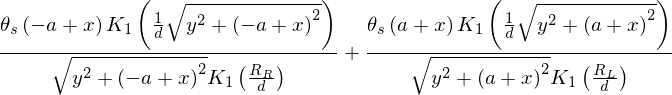

In [17]:
ny_tot

In [12]:
# plotting.plot3d(((ny_tot)),(x,-5,5),(y,-5,5));

In [13]:
#simplify(nx_tot), simplify(ny_tot)

In [18]:
dxnx_2cyl = nx_tot.diff(x)
dynx_2cyl = nx_tot.diff(y)
dxny_2cyl = ny_tot.diff(x)
dyny_2cyl = ny_tot.diff(y)

In [15]:
simplify((dxnx_2cyl + dyny_2cyl)**2)

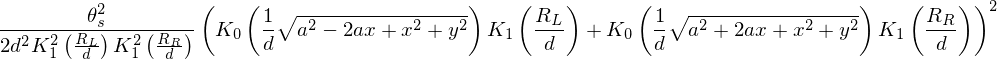

In [19]:
simplify(((dxny_2cyl - dynx_2cyl)**2)/2)

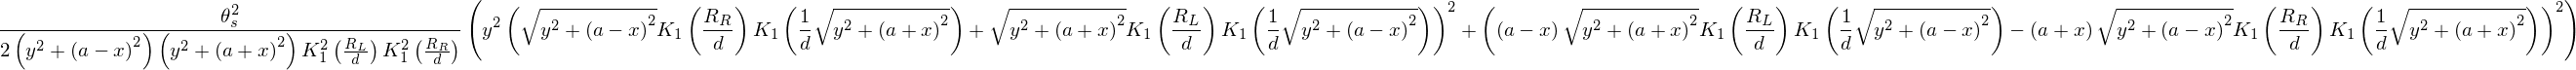

In [20]:
simplify((nx_tot**2 + ny_tot**2)/2)

In [ ]:
ef

In [ ]:
def f_2(n1, n2, theta_s, a, R_L, R_R, d, dxnx, dynx, dxny, dyny):
    return (d**2/2)*(dxnx**2 + dynx**2 + dxny**2 + dyny**2 + 2*dxnx*dyny - 2*dxny*dynx) + (1/2)*(n1**2 + n2**2) - (1/2)

In [ ]:
f_2cyl = f_2(nx_tot, ny_tot, theta_s, a, R_L, R_R, d, dxnx_2cyl, dynx_2cyl, dxny_2cyl, dyny_2cyl)

In [ ]:
plotting.plot3d((ef), (x,-5,5), (y,-5,5));

In [ ]:
plotting.plot3d((ef), (x,0,0), (y,-5,5));

In [ ]:
xTEST = np.linspace(1,30,200)
yTEST = np.linspace(1,30,200)
xZEROS = np.zeros(200)
yZEROS = np.zeros(200)

In [ ]:
#if __name__ == '__main__':

#    sym2sci = {'besselj':jv,'besselk':kv,'besseli':iv,'bessely':yv}

#    y = besselj(v+1,x)/x+x*besselk(v,x)-x**2*bessely(2,x)
#    yx = diff(y,x)
#    f = lambdify((v,x),yx,sym2sci)
#    xn = np.linspace(0.01,5,100)

#    plt.plot(xn,f(1,xn),lw=2)

#    plt.show()

In [ ]:
if __name__ == '__main__':

    sy2sc = {'besselj':jv,'besselk':kv,'besseli':iv,'bessely':yv}
    
    NX_L = -theta_s*y*besselk(1,sqrt((x+a)**2 + y**2)/d)/(sqrt((x+a)**2 + y**2)*besselk(1,R_L/d))
    NX_R = -theta_s*y*besselk(1,sqrt((x-a)**2 + y**2)/d)/(sqrt((x-a)**2 + y**2)*besselk(1,R_R/d))
    NX = NX_L + NX_R
    
    NY_L = theta_s*(x+a)*besselk(1,sqrt((x+a)**2 + y**2)/d)/(sqrt((x+a)**2 + y**2)*besselk(1,R_L/d))
    NY_R = theta_s*(x-a)*besselk(1,sqrt((x-a)**2 + y**2)/d)/(sqrt((x-a)**2 + y**2)*besselk(1,R_R/d))
    NY = NY_L + NY_R
    
    DXNX = NX.diff(x)
    DYNX = NX.diff(y)
    DXNY = NY.diff(x)
    DYNY = NY.diff(y)
    
    FFF = (d**2/2)*(DXNX**2 + DYNX**2 + DXNY**2 + DYNY**2 + 2*DXNX*DYNY - 2*DXNY*DYNX) + (1/2)*(NX**2 + NY**2)
    #fff = lambdify((d,a,R_L,R_R,x,y), FFF, sy2sc)

In [ ]:
lambdify((a, R_L, R_R, d, theta_s, x, y), NX(a, R_L, R_R, d, theta_s, x, y), sy2sc)

In [ ]:
nx_L_lam = lambdify([R_L,theta_s,d], nx_cart(sqrt(394), 10, 15, theta_s, R_L, d),'numpy')

In [ ]:
func = lambdify([a,d,R_L,R_R,theta_s], f_2(nx_tot, ny_tot, theta_s, a, R_L, R_R, d, dxnx_2cyl, dynx_2cyl, dxny_2cyl, dyny_2cyl), modules='numpy',dummify=False)

In [ ]:
plot(sqrt(xZEROS**2+yTEST**2),f_2(nx_tot, ny_tot, theta_s, d, dxnx_2cyl, dynx_2cyl, dxny_2cyl, dyny_2cyl))

In [ ]:
I, e = quad(simple_f, 1, 200, args=(0.2, 10, 1, 500))

In [ ]:
I

In [ ]:
plt.scatter(np.linspace(1,200,1000), simple_f(np.linspace(1,200,1000), np.pi/6, 9, 1, 3.9))
plt.xlim(0,10), plt.ylim(0, 25.5);

In [ ]:
simple_f(1, np.pi/6, 9, 1, 3.9)